# HW 7: Machine Learning
---
## OR/ISE 501 - Fall 2021
__Assigned:__ Tue, 2 Nov (Groups of 2)  
__Due:__ 4p, Tue, 9 Nov

__Group Members:__ Kamlesh Pandey & Ronak Dhongde

Please use the Code cells in this Jupyter notebook to answer each of the following questions. You can add additional cells for each question if that helps in organizing your solution. Please run all of the cells in your notebook and then submit it via Moodle. (There is a _Run All Cells_ command under the _Run_ menu.)

---
__(1)__ Determine the first six warehouse design parameters listed in _Ex 2_ of _ML-1_ ("Total Lines" to "Cube Movement") using the files _HW7-Data-item_master.csv_ and _HW7-Data-orderset1.csv_. In addition, determine a new parameter, "Weight per Order," which is the average total weight of the units in an order. The length, width, and depth are in inches; cube is in cubic inches; and weight is in pounds.

In [1]:
using DataFrames, CSV
itemMasterFile = "HW7-Data-item_master.csv"
ordersetFile = "HW7-Data-orderset1.csv"
dfItemMaster = DataFrame(CSV.File(itemMasterFile))
dfOrder = DataFrame(CSV.File(ordersetFile))

first(dfOrder,5)

,ORDER,SKU,QTY
,Int64,Int64,Int64
1,1,2,4
2,1,8,1
3,2,2,4
4,2,4,3
5,2,6,5


In [2]:
first(dfItemMaster,5)

,SKU,LENGTH,WIDTH,DEPTH,CUBE,WEIGHT,UOM
,Int64,Int64,Int64,Int64,Int64,Float64,String
1,1,6,4,3,72,0.4012,EA
2,2,6,6,3,108,0.3703,EA
3,3,8,2,4,64,0.3099,EA
4,4,7,4,3,84,0.4334,EA
5,5,5,6,2,60,0.2998,EA


## 1. Total Lines

In [3]:
# Using a dictionary
dp = Dict()
dp[:Total_Lines] = nrow(dfOrder)
dp

Dict{Any, Any} with 1 entry:
  :Total_Lines => 41

## 2. Lines per Order

In [4]:
# Unique ordes
uniqueOrder = length(unique(dfOrder[!, :ORDER]))

# Adding lines per order key in the dictionary
dp[:Lines_per_order] = dp[:Total_Lines]/uniqueOrder
dp

Dict{Any, Any} with 2 entries:
  :Total_Lines     => 41
  :Lines_per_order => 2.05

## 3. Cube Per Order

In [5]:
df = innerjoin(dfOrder,dfItemMaster, on=:SKU)
first(df,5)

,ORDER,SKU,QTY,LENGTH,WIDTH,DEPTH,CUBE,WEIGHT,UOM
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,String
1,1,2,4,6,6,3,108,0.3703,EA
2,1,8,1,5,5,3,52,0.397,EA
3,2,2,4,6,6,3,108,0.3703,EA
4,2,4,3,7,4,3,84,0.4334,EA
5,2,6,5,5,4,2,40,0.2613,EA


In [6]:
TOTAL_CUBIC = []
ORDER = []
for order in unique(df.ORDER)
    append!(ORDER, Int64(order))
    result = sum(df.QTY[df.ORDER.==order].*df.CUBE[df.ORDER.==order])
    append!(TOTAL_CUBIC,Float64(result))
end

# Creating a new dataframe for the total cost 
finalDf = DataFrame(Order = ORDER,
                    TOTAL_CUBIC = TOTAL_CUBIC)
(finalDf)

,Order,TOTAL_CUBIC
,Any,Any
1,1,484.0
2,2,936.0
3,3,360.0
4,4,324.0
5,5,168.0
6,6,600.0
7,7,64.0
8,8,532.0
9,9,120.0


## 4. Flow Per Item 

In [7]:
# Grouping each SKU 
gdf = groupby(df,:SKU)

,ORDER,SKU,QTY,LENGTH,WIDTH,DEPTH,CUBE,WEIGHT,UOM
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,String
1,4,1,3,6,4,3,72,0.4012,EA
2,6,1,6,6,4,3,72,0.4012,EA
3,10,1,6,6,4,3,72,0.4012,EA
4,16,1,4,6,4,3,72,0.4012,EA
5,18,1,4,6,4,3,72,0.4012,EA
,ORDER,SKU,QTY,LENGTH,WIDTH,DEPTH,CUBE,WEIGHT,UOM
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,String
1,1,8,1,5,5,3,52,0.397,EA
2,2,8,1,5,5,3,52,0.397,EA


In [8]:
combine(gdf,:QTY => sum)

,SKU,QTY_sum
,Int64,Int64
1,1,23
2,2,10
3,3,4
4,4,13
5,5,19
6,6,47
7,7,5
8,8,7


In [9]:
skudf = combine(gdf,:QTY => sum => :Flow_per_Item)

,SKU,Flow_per_Item
,Int64,Int64
1,1,23
2,2,10
3,3,4
4,4,13
5,5,19
6,6,47
7,7,5
8,8,7


## 5. Lines per Item 

In [10]:
combine(gdf,nrow)

,SKU,nrow
,Int64,Int64
1,1,5
2,2,3
3,3,4
4,4,5
5,5,8
6,6,7
7,7,3
8,8,6


In [11]:
skudf = innerjoin(skudf,combine(gdf,nrow => :Lines_per_Item),on=:SKU)

,SKU,Flow_per_Item,Lines_per_Item
,Int64,Int64,Int64
1,1,23,5
2,2,10,3
3,3,4,4
4,4,13,5
5,5,19,8
6,6,47,7
7,7,5,3
8,8,7,6


## 6. Cube Movement

In [12]:
for i in gdf
    result = sum(i.QTY.*i.CUBE)
    println(result)
end

1656
1080
256
1092
1140
1880
270
364


In [13]:
combine(gdf,[:QTY,:CUBE] => ((i,j) -> sum(i.*j)))

,SKU,QTY_CUBE_function
,Int64,Int64
1,1,1656
2,2,1080
3,3,256
4,4,1092
5,5,1140
6,6,1880
7,7,270
8,8,364


In [14]:
skudf = innerjoin(skudf,
    combine(gdf,[:QTY,:CUBE] => ((x,y) -> sum(x.*y)) => :Cube_Movement),on=:SKU)

,SKU,Flow_per_Item,Lines_per_Item,Cube_Movement
,Int64,Int64,Int64,Int64
1,1,23,5,1656
2,2,10,3,1080
3,3,4,4,256
4,4,13,5,1092
5,5,19,8,1140
6,6,47,7,1880
7,7,5,3,270
8,8,7,6,364


## 7. Weight Per Order

In [15]:
df = innerjoin(dfOrder,dfItemMaster, on=:SKU)
ORDER = []
AVG_WEIGHT = []
for order in unique(df.ORDER)
    append!(ORDER,Int32(order))
    result = sum(df.QTY[df.ORDER.==order].*df.WEIGHT[df.ORDER.==order])
    append!(AVG_WEIGHT, Float64(result))
end

# Creating a new dataframe for average weight
finalDf = DataFrame(Order = ORDER,
                    WEIGHT_Per_Order = AVG_WEIGHT)

finalDf

,Order,WEIGHT_Per_Order
,Any,Any
1,1,1.8782
2,2,4.4849
3,3,2.1674
4,4,1.8004
5,5,0.8668
6,6,3.274
7,7,0.3099
8,8,3.5326
9,9,0.5996


---
__(2)__ Using the orders in the file _HW7-Data-orderset1.csv_ along with the price of \\$18.00, 15.75, 16.20, 12.24, 25.43, 36.24, 18.75, and 8.45 per unit of SKUs 1 to 8, respectively, determine the total price for each individual order.

In [16]:
using DataFrames,CSV
file_path = "HW7-Data-orderset1.csv"
df0 = DataFrame(CSV.File(file_path))
describe(df0)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,ORDER,10.2683,1,10.0,20,0,Int64
2,SKU,4.73171,1,5.0,8,0,Int64
3,QTY,3.12195,1,2.0,12,0,Int64


In [17]:
first(df0,10)

,ORDER,SKU,QTY
,Int64,Int64,Int64
1,1,2,4
2,1,8,1
3,2,2,4
4,2,4,3
5,2,6,5
6,2,8,1
7,3,5,2
8,3,6,6
9,4,1,3


In [18]:
# Creating a new dataframe of SKUs and Unit cost of each SKU
UNIT_COST = ["18.00", "15.75", "16.20", "12.24", "25.43", "36.24", "18.75", "8.45"]
SKUs = [1, 2, 3, 4, 5, 6, 7, 8]
df1 = DataFrame(SKU = [1, 2, 3, 4, 5, 6, 7, 8],
                UNIT_COST = [18.00, 15.75, 16.20, 12.24, 25.43, 36.24, 18.75, 8.45])
describe(df1)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,SKU,4.5,1,4.5,8,0,Int64
2,UNIT_COST,18.8825,8.45,17.1,36.24,0,Float64


In [19]:
# A combined dataframe using inner-joint at SKUs feature column
df = innerjoin(df0,df1,on=:SKU)
first(df,6)

,ORDER,SKU,QTY,UNIT_COST
,Int64,Int64,Int64,Float64
1,1,2,4,15.75
2,1,8,1,8.45
3,2,2,4,15.75
4,2,4,3,12.24
5,2,6,5,36.24
6,2,8,1,8.45


In [20]:
# Check unique orders in combined dataframe
len = length(unique(df[!,:ORDER]))
print("[INFO] Total number of unique orders in CSV file-->", len)

[INFO] Total number of unique orders in CSV file-->20

In [21]:
# Iterating over all orders to calculate total price of each order SUM(QTY*UNIT COST)
println("[INFO] Final total price dataframe of each order...")
TOTAL_PRICE = []
ORDER = []
for order in unique(df.ORDER)
    append!(ORDER, Int64(order))
    result = sum(df.QTY[df.ORDER.==order].*df.UNIT_COST[df.ORDER.==order])
    append!(TOTAL_PRICE,Float64(result))
end

# Creating a new dataframe for the total cost 
finalDf = DataFrame(Order = ORDER,
                    TOTAL_PRICE = TOTAL_PRICE)
(finalDf)

[INFO] Final total price dataframe of each order...


,Order,TOTAL_PRICE
,Any,Any
1,1,71.45
2,2,289.37
3,3,268.3
4,4,91.5
5,5,24.48
6,6,132.48
7,7,16.2
8,8,443.33
9,9,50.86


---
__(3)__ Recommend the best model to use to predict demand using _Ex 3_ from _ML-2_. In addition to `Orders + Visitors` used in the example, also consider `Orders + Visitors + Orders*Visitors` and `Orders + Visitors + Orders*Visitors + Orders^2 + Visitors^2` as possible models. Justify your recommendation by explaining the criterion or criteria and the method you used to make your recommendation:

__Recommendation:__  

RMS value for Orders + Visitors + Orders*Visitors + Orders^2 + Visitors^2 model is approx 46, which is lowest in all cases. So
for linear regression we should consider adding polynomial features of degree 2 in dataset.


__Justification:__ 

This problem is related to Polynomial featuring in machine learning i.e creating new faetures by raising power of existing features (Orders + Visitors + Orders*Visitors, Orders + Visitors + Orders*Visitors + Orders^2 + Visitors^2). A squared and cube version of an input feature will cange the distribution and, creating a gap between small and large values. This separation will help ML models in better prediction. Generally linear regression and classification model do well with polynomial featuring.

Adding Polynomial features is simple to implement and can go easy with any machine learning model. As the Bakery problem is not very complex dataset even a low polynomial feature can give good result with some hyperparameter tuning, however low polynomial feature can not deal with very complex datasets. Adding high polyomial degree (x^2, x^3, x^4...) can help model in better understanding of the dataset but adding high polynomial degree comes with a cost as it creates a huge number of features, making model too slow.

Fortunately with Support Vector Machine (SVM) we can add these polynomial features by using kernel trick, which make it possible to train model with any high degree polynomial feature without actually adding it to the dataset. But in this problem I have used Decision Tree regression model for predictions.

In [22]:
using DataFrames,CSV, MLJ,MLJLinearModels
file_path = "ML-2-bakery.csv"
bakeryDf = DataFrame(CSV.File(file_path))
first(bakeryDf,5)

,Orders,Visitors,Demand
,Int64,Int64,Int64
1,399,160,434
2,128,96,224
3,84,100,220
4,239,33,361
5,22,30,72


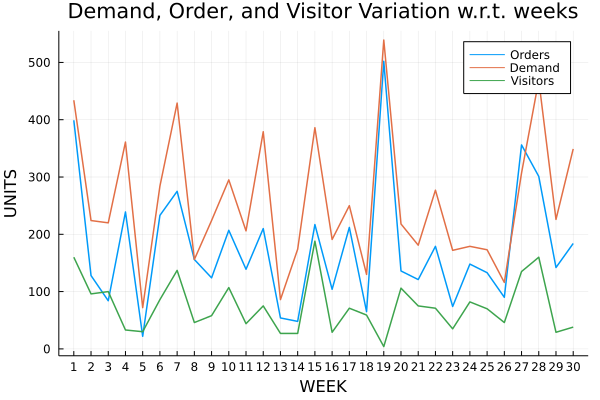

In [23]:
# Visulaizing deamnd and Order variations for intial 20 weeks
using Plots
d = bakeryDf.Demand[1:30]
o = bakeryDf.Orders[1:30]
v = bakeryDf.Visitors[1:30]
plot([o d v], xlabel = "WEEK", ylabel = "UNITS", xticks = 1:length(d), label = ["Orders"  "Demand" "Visitors"], title = "Demand, Order, and Visitor Variation w.r.t. weeks", lw=1.5)

In [24]:
describe(bakeryDf)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,Orders,171.122,22,146.0,502,0,Int64
2,Visitors,70.8163,2,68.0,194,0,Int64
3,Demand,265.143,72,236.0,539,0,Int64


In [25]:
using MLJ
schema(bakeryDf)

# Demand, Order, and Number of Visitor features are traeted as discreate by the MLJ module, but these feature should be continuous. 

┌──────────┬─────────┬────────────┐
│ _.names  │ _.types │ _.scitypes │
├──────────┼─────────┼────────────┤
│ Orders   │ Int64   │ Count      │
│ Visitors │ Int64   │ Count      │
│ Demand   │ Int64   │ Count      │
└──────────┴─────────┴────────────┘
_.nrows = 49


In [26]:
# Channging variables to continuous from discrete
bakeryDf = coerce(bakeryDf, :Demand=>Continuous, :Orders=>Continuous, :Visitors=>Continuous)
schema(bakeryDf)

┌──────────┬─────────┬────────────┐
│ _.names  │ _.types │ _.scitypes │
├──────────┼─────────┼────────────┤
│ Orders   │ Float64 │ Continuous │
│ Visitors │ Float64 │ Continuous │
│ Demand   │ Float64 │ Continuous │
└──────────┴─────────┴────────────┘
_.nrows = 49


In [27]:
y = bakeryDf.Demand   # We have to predict demand (dependent variable)
X = select(bakeryDf, Not(:Demand)) # Indepent features for the model

,Orders,Visitors
,Float64,Float64
1,399.0,160.0
2,128.0,96.0
3,84.0,100.0
4,239.0,33.0
5,22.0,30.0
6,233.0,86.0
7,275.0,137.0
8,156.0,46.0
9,124.0,58.0


### CASE-1: CONSIDERING VISTIORS & ORDERS FOR MODEL

In [28]:
#creating a separate dataframe for analysis

y = bakeryDf.Demand
X1 = select(bakeryDf, Not(:Demand))
first(X1,5)

,Orders,Visitors
,Float64,Float64
1,399.0,160.0
2,128.0,96.0
3,84.0,100.0
4,239.0,33.0
5,22.0,30.0


##### MODEL PREDICTION & ACCURACY 

In [29]:
# .7 of the dataset will be used for training and .3 as test to check model accuracy
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=3425)

([41, 29, 30, 31, 18, 47, 11, 22, 16, 12  …  9, 25, 15, 17, 2, 38, 5, 32, 40, 24], [23, 13, 27, 19, 46, 14, 3, 45, 44, 33, 8, 7, 28, 37, 43])

In [30]:
# Import Linear Regression model

using MLJLinearModels
@load LinearRegressor pkg=MLJLinearModels

# creating an object from LinearRegressor class
model1 = LinearRegressor()

mach = machine(model1, X1, y)

# fiting the model for train data
fit!(mach, rows=train, verbosity=0);

print("[INFO] Printing model's intercept and coefs....")
model_params = fitted_params(mach)

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\kamle\.julia\packages\MLJModels\4sRmw\src\loading.jl:168


import MLJLinearModels ✔
[INFO] Printing model's intercept and coefs....

(coefs = [:Orders => 1.034632310571842, :Visitors => 0.2848019868524692],
 intercept = 76.2338458769853,)

In [31]:
# Prediction from the model1
ŷ = predict(mach, rows=test)

[ŷ y[test,:]]

15×2 Matrix{Float64}:
 162.765  172.0
 139.794   86.0
 483.011  307.0
 596.758  539.0
 261.239  282.0
 133.586  174.0
 191.623  220.0
 143.02   111.0
 214.327  182.0
 229.021  236.0
 250.737  156.0
 399.776  429.0
 433.226  469.0
 364.576  280.0
 144.653   98.0

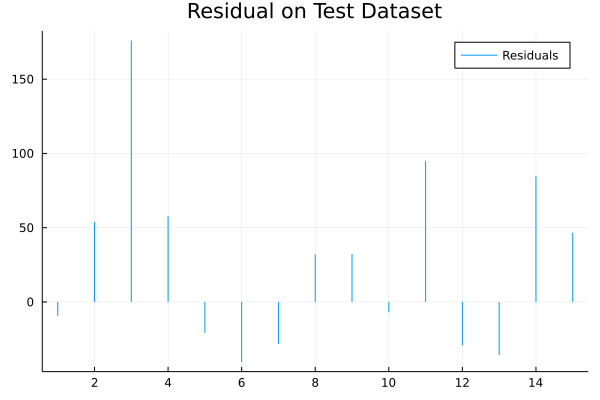

In [32]:
res = ŷ .- y[test]
using Plots
plot(res, line=:stem, label="Residuals", title="Residual on Test Dataset")

In [33]:
print("Root mean squared Error is on test dataset: ",rms(ŷ , y[test]))

Root mean squared Error is on test dataset: 64.66435320753095

### CASE-2: CONSIDERING ORDERS*VISITORS IN MODEL

In [34]:
X2 = hcat(X, X.Orders.*X.Visitors)  # adding a new feature of Orders*Visitors
rename!(X2, :x1 => :Orders_Visitors)
first(X2,5)

,Orders,Visitors,Orders_Visitors
,Float64,Float64,Float64
1,399.0,160.0,63840.0
2,128.0,96.0,12288.0
3,84.0,100.0,8400.0
4,239.0,33.0,7887.0
5,22.0,30.0,660.0


##### MODEL PREDICTION & ACCURACY 

In [35]:
# .7 of the dataset will be used for training and .3 as test to check model accuracy
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=1234)

# Import Linear Regression model
using MLJLinearModels
@load LinearRegressor pkg=MLJLinearModels

# creating an object from LinearRegression class
model2 = LinearRegressor()

mach = machine(model2, X2, y)

# fiting the model for train data
fit!(mach, rows=train)

print("[INFO] Printing model's intercept and coefs....")
model_params = fitted_params(mach)

import MLJLinearModels ✔

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\kamle\.julia\packages\MLJModels\4sRmw\src\loading.jl:168


┌ Info: Training Machine{LinearRegressor,…}.
└ @ MLJBase C:\Users\kamle\.julia\packages\MLJBase\u6vLz\src\machines.jl:403


[INFO] Printing model's intercept and coefs....

(coefs = [:Orders => 1.0399248556089347, :Visitors => 1.332025911713761, :Orders_Visitors => -0.0034669650856415588],
 intercept = 44.727424642882355,)

##### Chcking model prediction on the test dataset (30% reserved data from main dataframe)

In [36]:
ŷ = predict(mach, X2[test,:])
[ŷ y[test]]

15×2 Matrix{Float64}:
 251.261  236.0
 243.35   156.0
 244.002  173.0
 234.81   182.0
 386.445  451.0
 309.882  361.0
 325.729  295.0
 181.052  191.0
 236.161  220.0
 277.372  218.0
 216.749  226.0
 159.323  172.0
 308.409  379.0
 265.787  179.0
 113.503  111.0

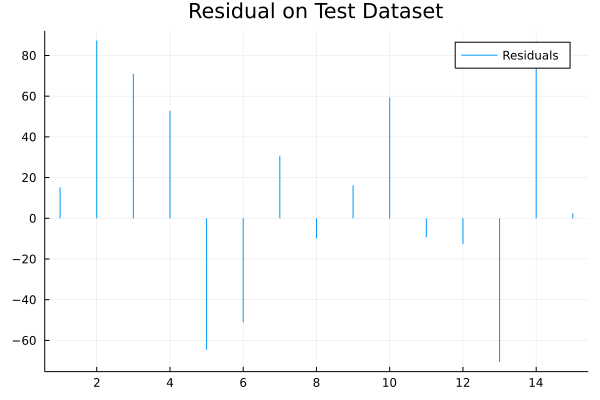

In [37]:
res = ŷ .- y[test]
using Plots
plot(res, line=:stem, label="Residuals", title="Residual on Test Dataset")

In [38]:
print("Root mean squared Error is on test dataset: ",rms(ŷ , y[test]))

Root mean squared Error is on test dataset: 51.685257034090526

##### Chcking model prediction on complete dataset

In [39]:
ŷ = predict(mach, X2)
[ŷ y]

49×2 Matrix{Float64}:
 451.451  434.0
 263.11   224.0
 236.161  220.0
 309.882  361.0
 105.278   72.0
 332.113  284.0
 382.576  429.0
 243.35   156.0
 226.001  224.0
 325.729  295.0
 226.682  206.0
 308.409  379.0
 131.793   86.0
   ⋮      
 412.523  479.0
 246.683  203.0
 247.489  205.0
 193.311  239.0
 241.272  238.0
 125.959   98.0
 234.81   182.0
 113.503  111.0
 309.695  282.0
 223.809  190.0
 284.782  330.0
 275.348  292.0

In [40]:
print("Root mean squared Error on complete dataset: ", rms(ŷ, y))

Root mean squared Error on complete dataset: 61.73246370893014

### CASE-3: CONSIDERING Orders^2 + Visitors^2 IN MODEL

In [41]:
#Adding Orders^2 in the data frame
X3 = hcat(X, X.Orders.^2)
rename!(X3, :x1 => :Orders2)
first(X3,5)

,Orders,Visitors,Orders2
,Float64,Float64,Float64
1,399.0,160.0,159201.0
2,128.0,96.0,16384.0
3,84.0,100.0,7056.0
4,239.0,33.0,57121.0
5,22.0,30.0,484.0


In [42]:
# Adding Visitors^2 in dataframe
X3 = hcat(X3, X3.Visitors.^2)
rename!(X3, :x1 => :Visitors2)
first(X3,5)

,Orders,Visitors,Orders2,Visitors2
,Float64,Float64,Float64,Float64
1,399.0,160.0,159201.0,25600.0
2,128.0,96.0,16384.0,9216.0
3,84.0,100.0,7056.0,10000.0
4,239.0,33.0,57121.0,1089.0
5,22.0,30.0,484.0,900.0


##### MODEL PREDICTION & ACCURACY 

In [43]:
# .7 of the dataset will be used for training and .3 as test to check model accuracy
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=1234)

# Import Linear Regression model
using MLJLinearModels
@load LinearRegressor pkg=MLJLinearModels

# creating an object from LinearRegression class
model3 = LinearRegressor()

mach = machine(model2, X3, y)

# fiting the model for train data
fit!(mach, rows=train)

print("[INFO] Printing model's intercept and coefs....")
model_params = fitted_params(mach)

import MLJLinearModels ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\kamle\.julia\packages\MLJModels\4sRmw\src\loading.jl:168
┌ Info: Training Machine{LinearRegressor,…}.
└ @ MLJBase C:\Users\kamle\.julia\packages\MLJBase\u6vLz\src\machines.jl:403


[INFO] Printing model's intercept and coefs....

(coefs = [:Orders => 1.3912088149629651, :Visitors => -0.2805245777150104, :Orders2 => -0.0011302403076394762, :Visitors2 => 0.0032720430856547117],
 intercept = 70.11267953689506,)

In [44]:
ŷ = predict(mach, X3[test,:])
[ŷ y[test]]

15×2 Matrix{Float64}:
 225.319  236.0
 253.655  156.0
 231.547  173.0
 209.777  182.0
 393.207  451.0
 332.357  361.0
 317.109  295.0
 197.19   191.0
 183.667  220.0
 245.441  218.0
 239.491  226.0
 161.063  172.0
 309.789  379.0
 250.253  179.0
 153.973  111.0

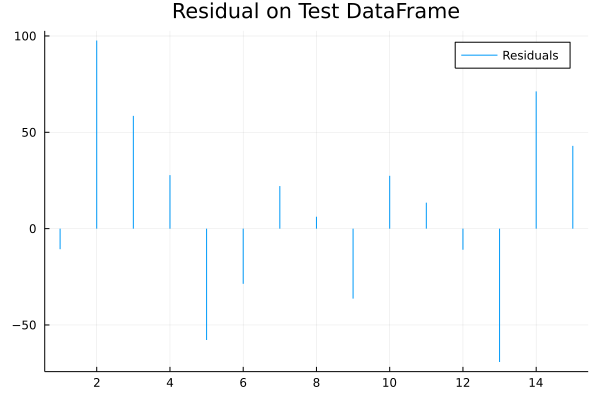

In [45]:
res = ŷ .- y[test]
using Plots
plot(res, line=:stem, label="Residuals", title="Residual on Test DataFrame")

In [46]:
println("Root Mean Square value on test dataset is: ", rms(ŷ, y[test]))

Root Mean Square value on test dataset is: 46.63760976435864


In [47]:
ŷ = predict(mach, X3)
[ŷ y]

49×2 Matrix{Float64}:
 484.15    434.0
 232.894   224.0
 183.667   220.0
 332.357   361.0
  94.7013   72.0
 332.98    284.0
 390.202   429.0
 253.655   156.0
 219.981   224.0
 317.109   295.0
 235.645   206.0
 309.789   379.0
 136.753    86.0
   ⋮       
 413.742   479.0
 204.19    203.0
 279.323   205.0
 204.801   239.0
 217.037   238.0
 148.551    98.0
 209.777   182.0
 153.973   111.0
 268.227   282.0
 243.443   190.0
 323.226   330.0
 298.327   292.0

In [48]:
println("Root Mean Square value on test dataset is: ", rms(ŷ, y))

Root Mean Square value on test dataset is: 60.85747127444592


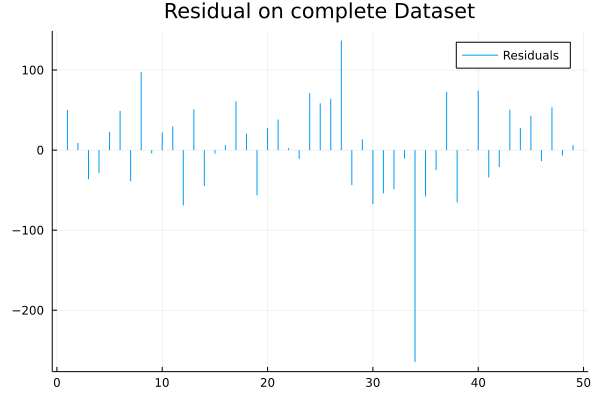

In [49]:
res = ŷ .- y
using Plots
plot(res, line=:stem, label="Residuals", title="Residual on complete Dataset")

---
__(4)__ _The Kaygle ML Competition:_ Kaggle has a [ML competition](https://www.kaggle.com/c/titanic/overview) from which the Kaygle competition is derived. In file _HW7-Data-test.csv_ has the factors that you can use to make a survival prediction for 21 test passengers that were not in _ML-3-Titanic-train.csv_. Your prediction for each passenger should be added to the _Prediction_ column of the table below, where 1 indicates that you are prediction that the passenger survived and 0 that they did not. There is an additional column, _ID_, in _HW7-Data-test.csv_ that can be used in place of _Name_ to identify each passenger. Your predictions will be evaluated based on their accuracy with repect to the known survival of the 21 test passengers. You can use any variations with respect to the parameter settings of `DecisionTreeClassifier` used in _ML-3_, but no other ML methods can be used. You can also consider using new features if they are derived from the original features. All of your analysis should be derived from the data in _ML-3-Titanic-train.csv_ and _HW7-Data-test.csv_ and shown in the code cells below:

| Record | ID | Prediction |
| ---: | ---: | ---: |
| 1 | 100 |  | 
| 2 | 101 |  | 
| 3 | 102 |  | 
| 4 | 103 |  | 
| 5 | 104 |  | 
| 6 | 105 |  | 
| 7 | 106 |  | 
| 8 | 107 |  | 
| 9 | 108 |  | 
| 10 | 109 |  |
| 11 | 110 |  | 
| 12 | 111 |  | 
| 13 | 112 |  | 
| 14 | 113 |  | 
| 15 | 114 |  | 
| 16 | 115 |  | 
| 17 | 116 |  | 
| 18 | 117 |  |
| 19 | 118 |  | 
| 20 | 119 |  | 
| 21 | 120 |  | 


In [50]:
# Importing train dataset
using DataFrames, CSV
file_path = "ML-3-Titanic-train.csv"
df = DataFrame(CSV.File(file_path))
first(df,10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard
,Int64,Int64,String,String,Float64,Int64
1,1,1,Mr. Dickinson H Bishop,male,25.0,1
2,0,3,Miss. Aloisia Haas,female,24.0,0
3,0,3,Mr. William Alfred Brocklebank,male,35.0,0
4,0,3,Mr. Samuel Beard Risien,male,69.0,0
5,1,1,Mr. Harry Anderson,male,48.0,0
6,1,3,Mr. Bernt Johannesen-Bratthammer,male,29.0,0
7,0,3,Miss. Mary Bourke,female,40.0,0
8,0,3,Master. Henry Forbes Lefebre,male,5.0,3
9,0,3,Mr. Francis William Somerton,male,30.0,0


In [51]:
describe(df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,Survived,0.394366,0,0.0,1
2,Pclass,2.30704,1,3.0,3
3,Name,,Capt. Edward Gifford Crosby,,Rev. Thomas Roussel Davids Byles
4,Sex,,female,,male
5,Age,29.4592,0.42,28.0,74.0
6,Siblings/Spouses Aboard,0.512676,0,0.0,8
7,Parents/Children Aboard,0.394366,0,0.0,6
8,Fare,32.3272,0.0,14.4563,512.329


In [52]:
rename!(df, "Siblings/Spouses Aboard"=>:Sibsp, "Parents/Children Aboard"=>:Parch)
df = select(df, Not(:Name))
first(df, 5)

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare
,Int64,Int64,String,Float64,Int64,Int64,Float64
1,1,1,male,25.0,1,0,91.0792
2,0,3,female,24.0,0,0,8.85
3,0,3,male,35.0,0,0,8.05
4,0,3,male,69.0,0,0,14.5
5,1,1,male,48.0,0,0,26.55


In [53]:
schema(df)

┌──────────┬─────────┬────────────┐
│ _.names  │ _.types │ _.scitypes │
├──────────┼─────────┼────────────┤
│ Survived │ Int64   │ Count      │
│ Pclass   │ Int64   │ Count      │
│ Sex      │ String  │ Textual    │
│ Age      │ Float64 │ Continuous │
│ Sibsp    │ Int64   │ Count      │
│ Parch    │ Int64   │ Count      │
│ Fare     │ Float64 │ Continuous │
└──────────┴─────────┴────────────┘
_.nrows = 710


## EDA(Exploratory data analysis)

### 1. Pclass 

Boarding class of each passenger, check for unique values in PClass feature and look for any missing value

In [54]:
unique(df[!,:Pclass])

3-element Vector{Int64}:
 1
 3
 2

### 2. Survived 

Converting survial value {0,1} into ordered factor

In [55]:
df.Survived = coerce(df.Survived, OrderedFactor)
schema(df)

┌──────────┬─────────────────────────────────┬──────────────────┐
│ _.names  │ _.types                         │ _.scitypes       │
├──────────┼─────────────────────────────────┼──────────────────┤
│ Survived │ CategoricalValue{Int64, UInt32} │ OrderedFactor{2} │
│ Pclass   │ Int64                           │ Count            │
│ Sex      │ String                          │ Textual          │
│ Age      │ Float64                         │ Continuous       │
│ Sibsp    │ Int64                           │ Count            │
│ Parch    │ Int64                           │ Count            │
│ Fare     │ Float64                         │ Continuous       │
└──────────┴─────────────────────────────────┴──────────────────┘
_.nrows = 710


### 3. Sex

Model will not understand categorical values, so we need to convert Male and Female into OrderedFactor

In [56]:
df.Sex = coerce(df.Sex, OrderedFactor)
df.Sex = coerce(df.Sex, Count)
schema(df)

┌──────────┬─────────────────────────────────┬──────────────────┐
│ _.names  │ _.types                         │ _.scitypes       │
├──────────┼─────────────────────────────────┼──────────────────┤
│ Survived │ CategoricalValue{Int64, UInt32} │ OrderedFactor{2} │
│ Pclass   │ Int64                           │ Count            │
│ Sex      │ Int64                           │ Count            │
│ Age      │ Float64                         │ Continuous       │
│ Sibsp    │ Int64                           │ Count            │
│ Parch    │ Int64                           │ Count            │
│ Fare     │ Float64                         │ Continuous       │
└──────────┴─────────────────────────────────┴──────────────────┘
_.nrows = 710


In [57]:
y = df.Survived
X = select(df, Not(:Survived))
first(X, 5)

,Pclass,Sex,Age,Sibsp,Parch,Fare
,Int64,Int64,Float64,Int64,Int64,Float64
1,1,2,25.0,1,0,91.0792
2,3,1,24.0,0,0,8.85
3,3,2,35.0,0,0,8.05
4,3,2,69.0,0,0,14.5
5,1,2,48.0,0,0,26.55


## Model1: No depth Decision Tree

In [58]:
@load DecisionTreeClassifier pkg=DecisionTree verbosity=0
model = MLJDecisionTreeInterface.DecisionTreeClassifier()
mach = machine(model, X, y)

Machine{DecisionTreeClassifier,…} trained 0 times; caches data
  args: 
    1:	Source @616 ⏎ `Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}`
    2:	Source @384 ⏎ `AbstractVector{OrderedFactor{2}}`


#### Splitting dataset into train and validation dataset (70% train, 30% Test)

In [59]:
train, val = partition(eachindex(y), 0.7, shuffle=true, rng=7245)

([101, 70, 656, 623, 103, 575, 576, 115, 506, 188  …  328, 123, 321, 318, 297, 201, 41, 184, 22, 592], [521, 77, 180, 290, 265, 86, 198, 31, 134, 209  …  79, 176, 531, 603, 606, 509, 447, 490, 478, 266])

In [60]:
# Fit the base Decision Tree classifier with training datast
fit!(mach, rows=train, verbosity=0)
mach.fitresult

(Decision Tree
Leaves: 105
Depth:  19, CategoricalArrays.CategoricalValue{Int64, UInt32}[0, 1], UInt32[0x00000001, 0x00000002])

In [61]:
# Without any depth cnstraint, the model has a depth of 19
report(mach).print_tree(3)

Feature 2, Threshold 1.5
L-> Feature 1, Threshold 2.5
    L-> Feature 3, Threshold 3.0
        L-> 1 : 1/1
        R-> 
    R-> Feature 6, Threshold 22.90415
        L-> 
        R-> 
R-> Feature 3, Threshold 13.0
    L-> Feature 4, Threshold 2.5
        L-> 2 : 15/15
        R-> 1 : 9/9
    R-> Feature 6, Threshold 26.26875
        L-> 
        R-> 


#### Model Accuracy

In [62]:
# creating a confusion matrix between actual and predicted values of validation datset
ŷ = predict_mode(mach, rows=val)
confusion_matrix(ŷ, y[val])

              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │      0      │      1      │
├─────────────┼─────────────┼─────────────┤
│      0      │     113     │     32      │
├─────────────┼─────────────┼─────────────┤
│      1      │     22      │     46      │
└─────────────┴─────────────┴─────────────┘


In [63]:
# Accuracy = Correct Prediction/ Total number of rows
println("The accuracy of base Decision tree Classifier on validation dataset is: ", accuracy(ŷ, y[val])*100, "%")

The accuracy of base Decision tree Classifier on validation dataset is: 74.64788732394366%


## HyperParameter tuning

In case of decision tree, it is desirable to have constraint on the depth of the Tree

In [64]:
# creating a new model, here depth is limited to 6 only
model2 = MLJDecisionTreeInterface.DecisionTreeClassifier(max_depth = 6)

DecisionTreeClassifier(
    max_depth = 6,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = false,
    merge_purity_threshold = 1.0,
    pdf_smoothing = 0.0,
    display_depth = 5,
    rng = Random._GLOBAL_RNG())

In [65]:
# Training model with train dataset
mach2 = machine(model2, X, y)
fit!(mach2, rows=train, verbosity=0)
report(mach2).print_tree(6)

Feature 2, Threshold 1.5
L-> Feature 1, Threshold 2.5
    L-> Feature 3, Threshold 3.0
        L-> 1 : 1/1
        R-> Feature 6, Threshold 28.85625
            L-> Feature 3, Threshold 43.0
                L-> Feature 3, Threshold 25.5
                    L-> 2 : 15/15
                    R-> 2 : 21/24
                R-> Feature 5, Threshold 1.5
                    L-> 1 : 3/3
                    R-> 2 : 1/1
            R-> Feature 5, Threshold 1.5
                L-> 2 : 58/58
                R-> Feature 6, Threshold 135.775
                    L-> 2 : 4/4
                    R-> 2 : 1/2
    R-> Feature 6, Threshold 22.90415
        L-> Feature 6, Threshold 18.62915
            L-> Feature 3, Threshold 36.5
                L-> Feature 3, Threshold 32.5
                    L-> 2 : 26/47
                    R-> 2 : 5/5
                R-> Feature 3, Threshold 62.5
                    L-> 1 : 5/5
                    R-> 2 : 1/1
            R-> 2 : 7/7
        R-> Feature 3, Threshold 5

In [66]:
# prediction from model
ŷ = predict_mode(mach2, rows=val)
confusion_matrix(ŷ, y[val])

              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │      0      │      1      │
├─────────────┼─────────────┼─────────────┤
│      0      │     126     │     27      │
├─────────────┼─────────────┼─────────────┤
│      1      │      9      │     51      │
└─────────────┴─────────────┴─────────────┘


In [67]:
# Accuracy = Correct Prediction/ Total number of rows
println("The accuracy of base Decision tree Classifier on validation dataset is: ", accuracy(ŷ, y[val])*100, "%")

The accuracy of base Decision tree Classifier on validation dataset is: 83.09859154929578%


## From confusion matrix it is evident that the there is an increase in TRUE POSITIVE and TRUE NEGATIVE (correct prediction), a desirable condition for an efficient model. Accuracy of model also increased from 75% to 83%

###  Decision tree model performance on test dataset 

In [68]:
test_file = "HW7-Data-test.csv"
testDf = DataFrame(CSV.File(test_file))
first(testDf,5)
    

,ID,Pclass,Name,Sex,Age,Siblings/Spouses Aboard
,Int64,Int64,String,String,Int64,Int64
1,100,3,Miss. Mabel Skoog,female,9,3
2,101,3,Mr. Youssef Samaan,male,16,2
3,102,2,Mr. Leonard Mark Hickman,male,24,2
4,103,1,Mr. Frederick Maxfield Hoyt,male,38,1
5,104,3,Mr. Henry Jr Sutehall,male,25,0


In [69]:
schema(testDf)

┌─────────────────────────┬─────────┬────────────┐
│ _.names                 │ _.types │ _.scitypes │
├─────────────────────────┼─────────┼────────────┤
│ ID                      │ Int64   │ Count      │
│ Pclass                  │ Int64   │ Count      │
│ Name                    │ String  │ Textual    │
│ Sex                     │ String  │ Textual    │
│ Age                     │ Int64   │ Count      │
│ Siblings/Spouses Aboard │ Int64   │ Count      │
│ Parents/Children Aboard │ Int64   │ Count      │
│ Fare                    │ Float64 │ Continuous │
└─────────────────────────┴─────────┴────────────┘
_.nrows = 21


### We have to perform following EDA on the test dataset, so that model can recognize the features and utilize the trained parameter

1. Survival class is absent (So no need to exclude from the dataset)
2. Need to convert SEX categorical class to Ordinal
3. Renaming Siblings/Spouses Aboard
4. Renaming Parents/Children Aboard

In [70]:
rename!(testDf, "Siblings/Spouses Aboard"=>:Sibsp, "Parents/Children Aboard"=>:Parch)
testDf = select(testDf, Not(:Name))

testDf.Sex = coerce(testDf.Sex, OrderedFactor)
testDf.Sex = coerce(testDf.Sex, Count)
testDf.Age = coerce(testDf.Age, Continuous)


first(testDf,5)

,ID,Pclass,Sex,Age,Sibsp,Parch,Fare
,Int64,Int64,Int64,Float64,Int64,Int64,Float64
1,100,3,1,9.0,3,2,27.9
2,101,3,2,16.0,2,0,21.6792
3,102,2,2,24.0,2,0,73.5
4,103,1,2,38.0,1,0,90.0
5,104,3,2,25.0,0,0,7.05


## Prediction on the test dataset

In [71]:
ŷ = predict_mode(mach2, testDf)

# Storing result in a DataFrame
result = DataFrame(ID = testDf.ID,
                    Prediction = ŷ)

,ID,Prediction
,Int64,Cat…
1,100,0
2,101,0
3,102,0
4,103,1
5,104,0
6,105,1
7,106,0
8,107,0
9,108,1
